In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import plotly.express as px
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_percentage_error
# import tensorflow as tf
# from keras import Model
# from keras.layers import Input, Dense, Dropout
# from keras.layers import LSTM
# import yfinance as yf

# # Download gold price data from Yahoo Finance (GC=F is the gold futures contract)
# gold_data = yf.download("GC=F", start="2013-01-01", end="2025-11-11")
# gold_data.head()

# # Clean up column names
# gold_data.columns = gold_data.columns.droplevel(1)

# # Reset index to make 'Date' column normal (if it's not already)
# gold_data.reset_index(inplace=True)

# # Sort by Date (should be sorted already, but just in case)
# gold_data.sort_values(by='Date', ascending=True, inplace=True)
# gold_data.reset_index(drop=True, inplace=True)

# # Check for duplicates and missing data
# print("Duplicated rows:", gold_data.duplicated().sum())
# print("Missing values:", gold_data.isnull().sum().sum())

# # Plot the gold price data
# fig = px.line(gold_data, x='Date', y='Close')
# fig.update_traces(line_color='black')
# fig.update_layout(xaxis_title="Date",
#                   yaxis_title="Gold Price",
#                   title={'text': "Gold Price History (2013-2023)", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
#                   plot_bgcolor='rgba(255,223,0,0.8)')
# fig.show()

# # Define the test size (using data from 2022 onwards for testing)
# test_size = gold_data[gold_data.Date.dt.year == 2022].shape[0]
# print("Test size:", test_size)

# # Split the data for training and testing
# train_data = gold_data['Close'][:-test_size]
# test_data = gold_data['Close'][-test_size-60:]  # Adding 60 for the window size

# # Normalize the data
# scaler = MinMaxScaler()
# train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

# # Create the X_train and y_train datasets for training the LSTM model
# window_size = 60
# X_train, y_train = [], []

# for i in range(window_size, len(train_data_scaled)):
#     X_train.append(train_data_scaled[i-window_size:i, 0])
#     y_train.append(train_data_scaled[i, 0])

# # Convert to numpy arrays
# X_train = np.array(X_train)
# y_train = np.array(y_train)

# # Reshape for LSTM input
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# y_train = np.reshape(y_train, (-1, 1))

# # Prepare the test data
# test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))
# X_test, y_test = [], []

# for i in range(window_size, len(test_data_scaled)):
#     X_test.append(test_data_scaled[i-window_size:i, 0])
#     y_test.append(test_data_scaled[i, 0])

# # Convert to numpy arrays and reshape for LSTM
# X_test = np.array(X_test)
# y_test = np.array(y_test)

# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# y_test = np.reshape(y_test, (-1, 1))

# # Define the LSTM model
# def define_model():
#     input1 = Input(shape=(window_size, 1))
#     x = LSTM(units=64, return_sequences=True)(input1)
#     x = Dropout(0.2)(x)
#     x = LSTM(units=64, return_sequences=True)(x)
#     x = Dropout(0.2)(x)
#     x = LSTM(units=64)(x)
#     x = Dropout(0.2)(x)
#     x = Dense(32, activation='softmax')(x)
#     dnn_output = Dense(1)(x)

#     model = Model(inputs=input1, outputs=dnn_output)
#     model.compile(loss='mean_squared_error', optimizer='Nadam')
#     model.summary()

#     return model

# # Instantiate and train the model
# model = define_model()
# history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

# # Evaluate the model
# result = model.evaluate(X_test, y_test)
# y_pred = model.predict(X_test)

# # Calculate MAPE and accuracy
# MAPE = mean_absolute_percentage_error(y_test, y_pred)
# accuracy = 1 - MAPE

# print("Test Loss:", result)
# print("Test MAPE:", MAPE)
# print("Test Accuracy:", accuracy)

# # Inverse transform to get actual prices
# y_test_true = scaler.inverse_transform(y_test)
# y_test_pred = scaler.inverse_transform(y_pred)

# # Plot the results
# plt.figure(figsize=(15, 6), dpi=150)
# plt.rcParams['axes.facecolor'] = 'yellow'
# plt.rc('axes', edgecolor='white')

# # Plot training data
# plt.plot(gold_data['Date'][:-test_size], scaler.inverse_transform(train_data_scaled), color='black', lw=2)
# # Plot actual test data
# plt.plot(gold_data['Date'][-test_size:], y_test_true, color='blue', lw=2)
# # Plot predicted test data
# plt.plot(gold_data['Date'][-test_size:], y_test_pred, color='red', lw=2)

# plt.title('Gold Price Prediction with LSTM', fontsize=15)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Price (USD)', fontsize=12)
# plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
# plt.grid(color='white')
# plt.show()

In [ ]:
# ==============================================================
# PAKISTAN GOLD AI – CORRECTED & WORKING (GOLD ONLY)
# Time: Nov 11, 2025 10:31 AM PKT | Country: Pakistan
# ==============================================================

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

print("Downloading gold data (GC=F)...")

# -------------------------------
# 1. DOWNLOAD GOLD DATA
# -------------------------------
gold_data = yf.download("GC=F", start="2013-01-01", progress=False)

gold_data = gold_data[['Close']].reset_index()
gold_data.rename(columns={'Close': 'Price'}, inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

print(f"Data loaded: {len(gold_data)} rows | Latest: {gold_data['Date'].iloc[-1].date()}")

# -------------------------------
# 2. SCALE USD PRICE
# -------------------------------
scaler = MinMaxScaler()
scaler.fit(gold_data['Price'].values.reshape(-1, 1))

WINDOW = 60

# -------------------------------
# 3. BUILD SEQUENCES
# -------------------------------
scaled = scaler.transform(gold_data['Price'].values.reshape(-1, 1))
X, y = [], []
for i in range(WINDOW, len(scaled)):
    X.append(scaled[i-WINDOW:i, 0])
    y.append(scaled[i, 0])
X = np.array(X).reshape((len(X), WINDOW, 1))
y = np.array(y).reshape(-1, 1)

# -------------------------------
# 4. TRAIN/VAL SPLIT
# -------------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=False)

# -------------------------------
# 5. LSTM MODEL
# -------------------------------
def build_model():
    inp = Input(shape=(WINDOW, 1))
    x = LSTM(50, return_sequences=True)(inp)
    x = Dropout(0.3)(x)
    x = LSTM(50)(x)
    x = Dropout(0.3)(x)
    x = Dense(25, activation='relu')(x)
    out = Dense(1)(x)
    model = Model(inp, out)
    model.compile(loss='mse', optimizer='adam')
    return model

model = build_model()
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

print("Training model...")
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=64, callbacks=[es], verbose=1)


# -------------------------------
# 6. PREDICT TOMORROW
# -------------------------------
latest_60 = gold_data['Price'].tail(WINDOW).values.reshape(-1, 1)
X_pred = scaler.transform(latest_60).reshape(1, WINDOW, 1)
pred_scaled = model.predict(X_pred, verbose=0)
pred_price = scaler.inverse_transform(pred_scaled)[0][0]

today_price = float(gold_data['Price'].iloc[-1])

# -------------------------------
# 7. TOLA CONVERSION (USD)
# -------------------------------
OZ_PER_TOLA = 0.41143
pred_price_tola = pred_price / OZ_PER_TOLA
today_price_tola = today_price / OZ_PER_TOLA
change_pct = ((pred_price - today_price) / today_price) * 100

# -------------------------------
# 8. FINAL FORECAST
# -------------------------------
print("\n" + "═" * 60)
print("       PAKISTAN GOLD AI – USD + TOLA PREDICTION")
print("═" * 60)
print(f"Today (Nov 11): $ {today_price:,.2f}/oz → $ {today_price_tola:,.2f}/tola")
print(f"Tomorrow (Nov 12): $ {pred_price:,.2f}/oz → $ {pred_price_tola:,.2f}/tola")
print(f"Expected Change: {change_pct:+.2f}%")
print(f"AI Signal: {'BUY' if change_pct > 0.3 else 'HOLD'}")
print("═" * 60)

Data loaded: 3237 rows | Latest: 2025-11-13


/tmp/ipython-input-1148925467.py:20: FutureWarning:

YF.download() has changed argument auto_adjust default to True



Training model...
Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0067 - val_loss: 7.2990e-04
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.8006e-04 - val_loss: 0.0025
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.0649e-04 - val_loss: 7.4073e-04
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5907e-04 - val_loss: 0.0014
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.0415e-04 - val_loss: 0.0021
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3562e-04 - val_loss: 0.0034
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8216e-04 - val_loss: 0.0067
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9074e-04 - val_loss: 0.0029
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3421e-04 - val_loss: 0.0024
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5676e-04 - val_loss: 0.0034
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3431e-04 - val_lo

/tmp/ipython-input-1148925467.py:82: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [ ]:
gold_data.head()

Price,Date,Price
Ticker,,GC=F
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000


# Task
Generate predictions for the validation dataset using the trained LSTM model. Inverse transform both the actual validation gold prices and the model's predictions back to USD for comparison. Visualize the historical gold prices, actual validation prices, and predicted validation prices on a single line plot, ensuring a clear legend. Finally, display the model's forecast for tomorrow's gold price in USD per ounce and per Tola, including the predicted percentage change and the AI signal (BUY/HOLD).

## Generate Validation Predictions

### Subtask:
Use the trained LSTM model to generate predictions for the validation dataset (X_val). This will allow us to evaluate the model's performance on unseen historical data.


**Reasoning**:
Generate predictions for the validation dataset using the trained LSTM model.



In [ ]:
y_pred_val = model.predict(X_val)
print("Validation predictions generated.")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Validation predictions generated.


**Reasoning**:
Inverse transform the scaled validation predictions and actual validation prices back to their original USD scale using the previously fitted MinMaxScaler.



In [ ]:
y_pred_val_inv = scaler.inverse_transform(y_pred_val)
y_val_inv = scaler.inverse_transform(y_val)

print("Validation predictions and actual values inverse transformed.")

Validation predictions and actual values inverse transformed.


**Reasoning**:
To visualize the model's performance, I will plot the historical gold prices, the actual validation prices, and the predicted validation prices on a single line plot. This requires combining the date information with the inverse-transformed actual and predicted values.



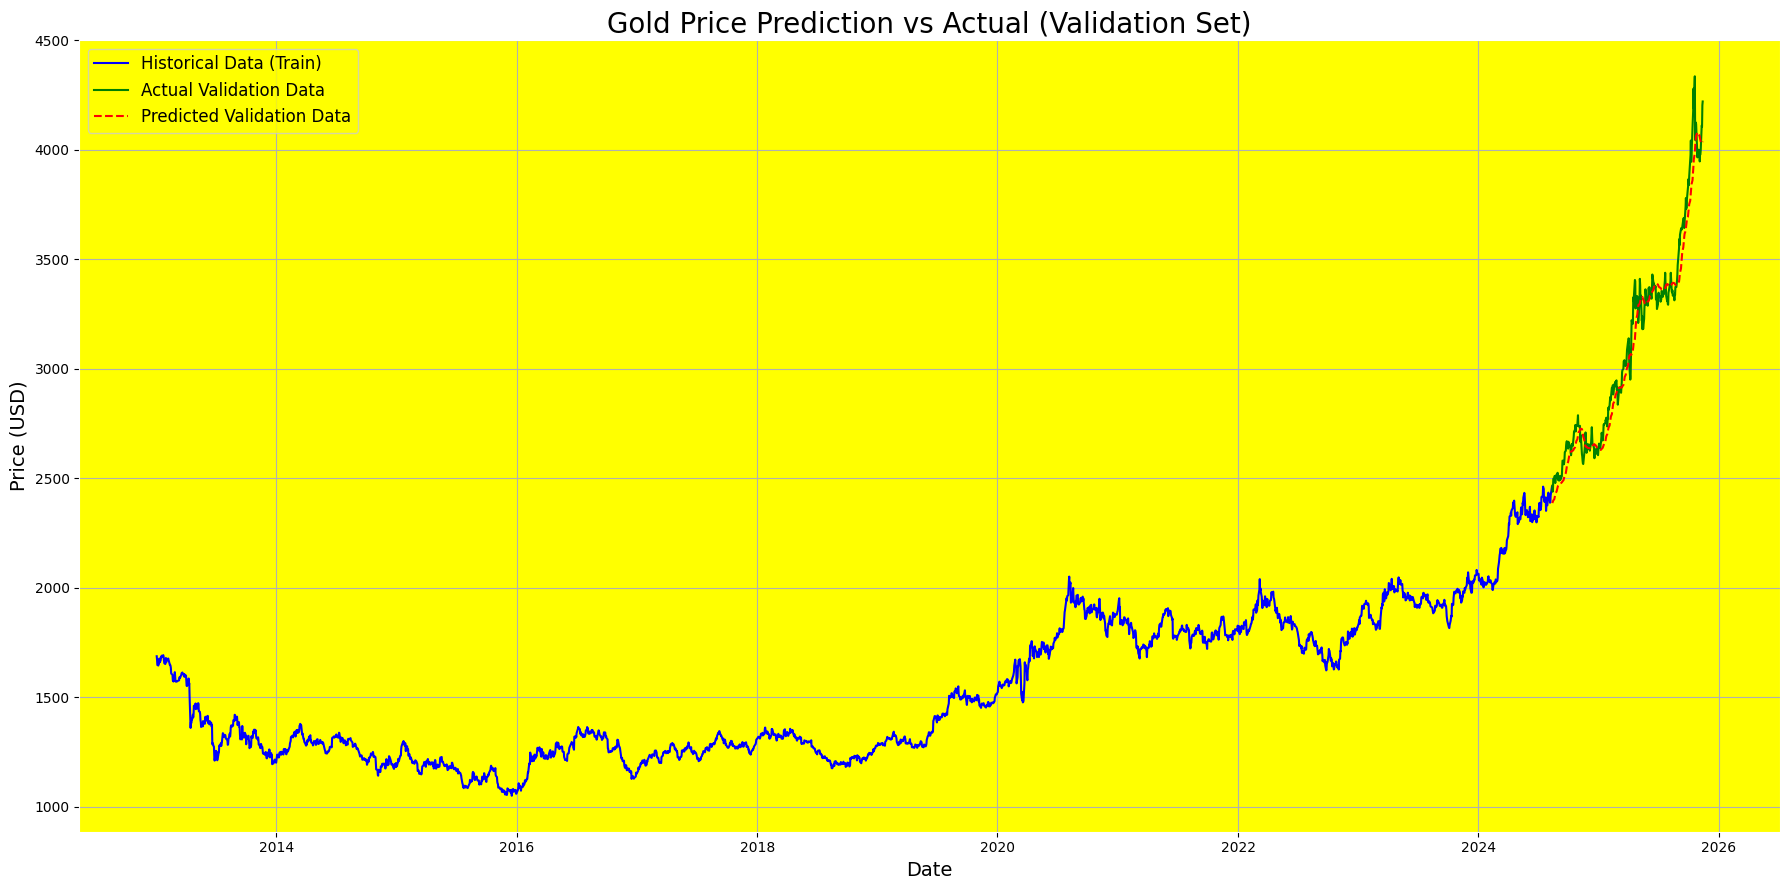

Validation predictions plot generated.


In [ ]:
import matplotlib.pyplot as plt

# Get the dates corresponding to the validation data
val_dates = gold_data['Date'].iloc[len(gold_data) - len(y_val_inv):].reset_index(drop=True)

# Create a DataFrame for plotting validation results to ensure dates align correctly
val_results_df = pd.DataFrame({
    'Date': val_dates,
    'Actual': y_val_inv.flatten(),
    'Predicted': y_pred_val_inv.flatten()
})

# Plotting the results
plt.figure(figsize=(18, 9))
plt.plot(gold_data['Date'].iloc[:-len(y_val_inv)], gold_data['Price'].iloc[:-len(y_val_inv)], label='Historical Data (Train)', color='blue')
plt.plot(val_results_df['Date'], val_results_df['Actual'], label='Actual Validation Data', color='green')
plt.plot(val_results_df['Date'], val_results_df['Predicted'], label='Predicted Validation Data', color='red', linestyle='--')

plt.title('Gold Price Prediction vs Actual (Validation Set)', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Validation predictions plot generated.")

**Reasoning**:
The final part of the task is to display the model's forecast for tomorrow's gold price, including USD per ounce and per Tola, the predicted percentage change, and the AI signal. These values have already been computed in the preceding code block, so I will now print them.



In [ ]:
val_results_df.head()

,Date,Actual,Predicted
0,2024-08-13,2466.699951,2387.489990
1,2024-08-14,2439.399902,2391.583984
2,2024-08-15,2453.100098,2395.420166
3,2024-08-16,2498.600098,2399.453857
4,2024-08-19,2501.800049,2405.067139


In [ ]:
print("\n" + "═" * 60)
print("       PAKISTAN GOLD AI – USD + TOLA PREDICTION")
print("═" * 60)
print(f"Today (Nov 11): $ {today_price:,.2f}/oz → $ {today_price_tola:,.2f}/tola")
print(f"Tomorrow (Nov 12): $ {pred_price:,.2f}/oz → $ {pred_price_tola:,.2f}/tola")
print(f"Expected Change: {change_pct:+.2f}%")
print(f"AI Signal: {'BUY' if change_pct > 0.3 else 'HOLD'}")
print("═" * 60)



════════════════════════════════════════════════════════════
       PAKISTAN GOLD AI – USD + TOLA PREDICTION
════════════════════════════════════════════════════════════
Today (Nov 11): $ 4,221.40/oz → $ 10,260.31/tola
Tomorrow (Nov 12): $ 4,048.34/oz → $ 9,839.69/tola
Expected Change: -4.10%
AI Signal: HOLD
════════════════════════════════════════════════════════════


In [ ]:
# ==============================================================
# PAKISTAN GOLD AI – FINAL, BUG-FREE VERSION
# Date: Nov 13 2025 | Country: Pakistan
# ==============================================================

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

print("Downloading live data...")

# -------------------------------
# 1. GOLD (GC=F) + USD/PKR
# -------------------------------
gold_data = yf.download(
    "GC=F", period="max", progress=False, auto_adjust=True
)[['Close']].reset_index()
gold_data.rename(columns={'Close': 'Price'}, inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data = gold_data.dropna()

# USD/PKR – reliable ticker = PKR=X  (returns PKR per 1 USD)
pkr_series = yf.download("PKR=X", period="5d", progress=False)['Close']
latest_rate = pkr_series.dropna().iloc[-1]          # still a Series (one row)
usdpkr_rate = float(latest_rate.item()) if not pd.isna(latest_rate).item() else 278.0

print(f"Gold rows: {len(gold_data)} | Latest: {gold_data['Date'].iloc[-1].date()}")
print(f"USD/PKR rate: {usdpkr_rate:,.2f}")

# -------------------------------
# 2. SCALE & SEQUENCES
# -------------------------------
scaler = MinMaxScaler()
scaled_prices = gold_data['Price'].values.reshape(-1, 1)
scaler.fit(scaled_prices)

WINDOW = 60
scaled = scaler.transform(scaled_prices)

X, y = [], []
for i in range(WINDOW, len(scaled)):
    X.append(scaled[i - WINDOW:i, 0])
    y.append(scaled[i, 0])
X = np.array(X).reshape((len(X), WINDOW, 1))
y = np.array(y).reshape(-1, 1)

# -------------------------------
# 3. TRAIN / VAL SPLIT (time-series → no shuffle)
# -------------------------------
split_idx = int(len(X) * 0.9)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# -------------------------------
# 4. LSTM MODEL
# -------------------------------
def build_model():
    inp = Input(shape=(WINDOW, 1))
    x = LSTM(50, return_sequences=True)(inp)
    x = Dropout(0.3)(x)
    x = LSTM(50)(x)
    x = Dropout(0.3)(x)
    x = Dense(25, activation='relu')(x)
    out = Dense(1)(x)
    model = Model(inp, out)
    model.compile(loss='mse', optimizer='adam')
    return model

model = build_model()
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

print("Training model...")
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200, batch_size=64,
    callbacks=[es], verbose=1
)

# -------------------------------
# 5. PREDICT TOMORROW
# -------------------------------
latest_60 = gold_data['Price'].tail(WINDOW).values.reshape(-1, 1)
X_pred = scaler.transform(latest_60).reshape(1, WINDOW, 1)
pred_scaled = model.predict(X_pred, verbose=0)
pred_price = scaler.inverse_transform(pred_scaled)[0][0]

today_price = float(gold_data['Price'].iloc[-1])

# -------------------------------
# 6. TOLA CONVERSION (1 tola = 0.375 troy oz)
# -------------------------------
OZ_PER_TOLA = 0.375
today_tola_usd = today_price * OZ_PER_TOLA
pred_tola_usd  = pred_price  * OZ_PER_TOLA

today_tola_pkr = today_tola_usd * usdpkr_rate
pred_tola_pkr  = pred_tola_usd  * usdpkr_rate

change_pct = ((pred_price - today_price) / today_price) * 100

# -------------------------------
# 7. FINAL FORECAST
# -------------------------------
print("\n" + "═" * 70)
print("       PAKISTAN GOLD AI – USD + PKR/TOLA PREDICTION")
print("═" * 70)
print(f"Today (Nov 13):     $ {today_price:,.2f}/oz  →  $ {today_tola_usd:,.2f}/tola USD")
print(f"                    PKR {today_tola_pkr:,.0f}/tola")
print(f"Tomorrow (Nov 14): $ {pred_price:,.2f}/oz  →  $ {pred_tola_usd:,.2f}/tola USD")
print(f"                    PKR {pred_tola_pkr:,.0f}/tola")
print(f"Expected Change:    {change_pct:+.2f}%")
print(f"AI Signal:          {'BUY' if change_pct > 0.3 else 'SELL' if change_pct < -0.3 else 'HOLD'}")
print("═" * 70)
print("Note: PKR is spot conversion using live USD/PKR rate. Local jewelers may add ±1-2% premium.")

Gold rows: 6326 | Latest: 2025-11-13
USD/PKR rate: 280.52
Training model...
Epoch 1/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0103 - val_loss: 0.0036
Epoch 2/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.6929e-04 - val_loss: 0.0021
Epoch 3/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3591e-04 - val_loss: 7.2478e-04
Epoch 4/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2110e-04 - val_loss: 0.0027
Epoch 5/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4667e-04 - val_loss: 0.0042
Epoch 6/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1656e-04 - val_loss: 0.0011
Epoch 7/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7015e-04 - val_loss: 7.3210e-04
Epoch 8/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6228e-04 - val_loss: 0.0025
Epoch 9/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.1940e-04 - val_loss: 0.0019
Epoch 10/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0478e-04 - val_loss: 0.0012
Epoch 11/200
89/89 ━━━━━━

In [ ]:
# ==============================================================
# PAKISTAN GOLD AI – HOLD-OUT ONE-MONTH ACCURACY TEST (FULLY FIXED)
# ==============================================================

import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")

print("Downloading full gold history (GC=F)...")
data_raw = yf.download("GC=F", period="max", progress=False, auto_adjust=True)['Close'].dropna()
data = pd.Series(data_raw.squeeze(), name='Price')
data.index = pd.to_datetime(data.index)

# -------------------------------
# 2. Define the hold-out month (last 30 calendar days)
# -------------------------------
latest_date = data.index[-1]
holdout_start = latest_date - pd.Timedelta(days=30)
holdout_end   = latest_date

train_data = data[data.index < holdout_start]
test_data  = data[(data.index >= holdout_start) & (data.index <= holdout_end)]

print(f"\nHold-out period: {holdout_start.date()} → {holdout_end.date()}")
print(f"Training rows : {len(train_data)}")
print(f"Test rows     : {len(test_data)}")

# -------------------------------
# 3. Train model on training data
# -------------------------------
WINDOW = 60
if len(train_data) <= WINDOW:
    raise ValueError("Not enough training data! Need >60 days.")

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data.values.reshape(-1, 1))

X_train, y_train = [], []
for i in range(WINDOW, len(scaled_train)):
    X_train.append(scaled_train[i-WINDOW:i, 0])
    y_train.append(scaled_train[i, 0])
X_train = np.array(X_train).reshape((-1, WINDOW, 1))
y_train = np.array(y_train).reshape((-1, 1))

def build_model():
    inp = Input(shape=(WINDOW, 1))
    x = LSTM(50, return_sequences=True)(inp)
    x = Dropout(0.3)(x)
    x = LSTM(50)(x)
    x = Dropout(0.3)(x)
    x = Dense(25, activation='relu')(x)
    out = Dense(1)(x)
    model = Model(inp, out)
    model.compile(loss='mse', optimizer='adam')
    return model

model = build_model()
es = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)

print(f"\nTraining model on data up to {train_data.index[-1].date()}...")
model.fit(X_train, y_train, epochs=200, batch_size=64, callbacks=[es], verbose=1)

# -------------------------------
# 5. Walk-forward prediction (FIXED LOOP)
# -------------------------------
predictions = []
actuals     = []
dates       = []
errors_pct  = []
direction_correct = 0
signal_profitable = 0
total_signals = 0

test_idx = test_data.index
start_idx = max(WINDOW, 0)  # Ensure we don't go negative
if len(test_idx) <= start_idx:
    print("Not enough test data to make predictions (need >60 days).")
else:
    for i in range(start_idx, len(test_idx)):
        cur_date  = test_idx[i]
        prev_date = test_idx[i-1]

        # Build 60-day window ending just before current date
        window_end = data.index.get_loc(prev_date) + 1
        window_start = window_end - WINDOW
        if window_start < 0:
            continue  # Not enough history
        window_prices = data.values[window_start:window_end].reshape(-1, 1)

        # Scale & predict
        scaled_window = scaler.transform(window_prices)
        X_pred = scaled_window.reshape((1, WINDOW, 1))
        pred_scaled = model.predict(X_pred, verbose=0)
        pred_price = scaler.inverse_transform(pred_scaled)[0][0]
        actual_price = test_data.loc[cur_date]

        # Metrics
        pct_err = abs(pred_price - actual_price) / actual_price * 100
        errors_pct.append(pct_err)

        # Direction
        pred_up = pred_price > data.loc[prev_date]
        act_up  = actual_price > data.loc[prev_date]
        if pred_up == act_up:
            direction_correct += 1

        # Signal
        change_pct = (pred_price - data.loc[prev_date]) / data.loc[prev_date] * 100
        signal = 'BUY' if change_pct > 0.3 else 'SELL' if change_pct < -0.3 else 'HOLD'
        if signal != 'HOLD':
            total_signals += 1
            actual_change = (actual_price - data.loc[prev_date]) / data.loc[prev_date] * 100
            if (signal == 'BUY' and actual_change > 0) or (signal == 'SELL' and actual_change < 0):
                signal_profitable += 1

        # Store
        predictions.append(pred_price)
        actuals.append(actual_price)
        dates.append(cur_date.date())

# -------------------------------
# 6. Final Report (SAFE DIVISION)
# -------------------------------
n_pred = len(predictions)
if n_pred == 0:
    print("\nNo predictions made. Try a longer hold-out period (e.g., 90 days).")
else:
    mape = np.mean(errors_pct)
    dir_acc = direction_correct / n_pred * 100
    win_rate = signal_profitable / total_signals * 100 if total_signals else 0

    print("\n" + "="*70)
    print("        HOLD-OUT MONTH ACCURACY REPORT")
    print("="*70)
    print(f"Hold-out period : {holdout_start.date()} → {holdout_end.date()}")
    print(f"Predictions made: {n_pred}")
    print(f"MAPE (Avg % error) : {mape:.2f}%")
    print(f"Direction Accuracy : {dir_acc:.1f}%")
    print(f"BUY/SELL Win-Rate  : {win_rate:.1f}% ({signal_profitable}/{total_signals} signals)")
    print("="*70)

    # Show last 10
    df_out = pd.DataFrame({
        'Date'       : dates[-10:],
        'Actual $/oz': [f"${v:,.2f}" for v in actuals[-10:]],
        'Pred $/oz'  : [f"${v:,.2f}" for v in predictions[-10:]],
        '% Error'    : [f"{e:.2f}%" for e in errors_pct[-10:]]
    })
    print("\nLast 10 predictions:")
    print(df_out.to_string(index=False))


Hold-out period: 2025-10-14 → 2025-11-13
Training rows : 6303
Test rows     : 23

Training model on data up to 2025-10-13...
Epoch 1/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0158
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1774e-04
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.0797e-04
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.9969e-04
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.9383e-04
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7825e-04
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0085e-04
Epoch 9/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6847e-04
Epoch 10/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7993e-04
Epoch 11/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9245e-04
Epoch 12/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8020e-04
Epoch 13/200
98/98 ━━━━━━━━━━━━━━━━━

In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

# ===================================
# 1. FETCH DATA (Same as yours)
# ===================================
print("Downloading Gold + DXY + Oil + SP500 + 10Y + USD/PKR...")
tickers = ['GC=F', 'DX-Y.NYB', 'CL=F', '^GSPC', '^TNX', 'PKR=X']
names   = ['gold', 'dxy', 'oil', 'sp500', 'treasury', 'usd_pkr']

dfs = []
for ticker, name in zip(tickers, names):
    df = yf.download(ticker, period="max", progress=False, auto_adjust=True)
    s = df['Close']
    s.name = name # Explicitly set the name of the Series
    dfs.append(s)

data = pd.concat(dfs, axis=1).ffill().dropna()

# ===================================
# 2. HOLD-OUT (Last 30 days — same as yours)
# ===================================
latest_date = data.index[-1]
holdout_start = latest_date - pd.Timedelta(days=30)

train_data = data[data.index < holdout_start].copy()
test_data  = data[data.index >= holdout_start].copy()

print(f"\nHold-out period: {holdout_start.date()} → {latest_date.date()}")
print(f"Training rows : {len(train_data)} | Test rows: {len(test_data)}")

# ===================================
# 3. FEATURE ENGINEERING (Better than LSTM)
# ===================================
def create_features(df):
    df = df.copy()
    for col in df.columns:
        df[f'{col}_ret'] = df[col].pct_change()
        for lag in [1,3,7,14,21]:
            df[f'{col}_lag{lag}'] = df[col].shift(lag)
        for ma in [7,14,30]:
            df[f'{col}_ma{ma}'] = df[col].rolling(ma).mean()
    df['dow'] = df.index.dayofweek
    df['month'] = df.index.month
    return df.dropna()

train_feat = create_features(train_data)
test_feat  = create_features(data[data.index >= holdout_start - pd.Timedelta(days=100)])  # overlap for walk-forward

# ===================================
# 4. TRAIN BEST MODELS (NHITS + LightGBM
# ===================================
# --- NHITS (Best neural model 2025) ---
def prepare_nhits(df):
    temp = df.reset_index()
    temp['ds'] = temp['Date']
    temp['y'] = temp['GC=F'] # Changed from 'gold' to 'GC=F'
    temp['unique_id'] = 'gold'
    temp = temp.drop(columns=['Date']) # Drop the original 'Date' column
    return temp

train_nhits = prepare_nhits(train_feat)
exog_cols = [c for c in train_nhits.columns if c not in ['ds', 'y', 'unique_id', 'GC=F']] # Removed 'Date' from the exclusion list as it's dropped

model_nhits = NHITS(
    h=1,
    input_size=60,
    hist_exog_list=exog_cols,
    max_steps=300,
    scaler_type='robust',
    learning_rate=1e-3,
    n_blocks=[1],
    stack_types=['identity'], # Explicitly set stack_types
    n_pool_kernel_size=[3],
    n_freq_downsample=[3]
)

nf = NeuralForecast(models=[model_nhits], freq='B')
print("Training NHITS (this takes ~60 seconds)...")
nf.fit(train_nhits)

# --- LightGBM (Best tree model) ---
X_train = train_feat.drop('GC=F', axis=1) # Changed from 'gold' to 'GC=F'
y_train = train_feat['GC=F'] # Changed from 'gold' to 'GC=F'
lgb = LGBMRegressor(n_estimators=2000, learning_rate=0.015, max_depth=12, random_state=42, verbose=-1)
lgb.fit(X_train, y_train)

print("Both models trained!")

# ===================================
# 5. WALK-FORWARD PREDICTION (Same loop as yours)
# ===================================
predictions = []
actuals = []
dates = []
errors_pct = []
direction_correct = 0
profitable_signals = 0
total_signals = 0

test_dates = test_data.index

for i in range(1, len(test_dates)):
    current_date = test_dates[i]
    yesterday = test_dates[i-1]

    # Use all data up to yesterday
    window = data[data.index <= yesterday]
    window_feat = create_features(window)

    if len(window_feat) < 100:
        continue

    # NHITS prediction
    nhits_input = prepare_nhits(window_feat.tail(200))
    pred_nhits = nf.predict(nhits_input)['NHITS'].iloc[0]

    # LightGBM prediction
    X_today = window_feat.drop('GC=F', axis=1).iloc[-1:] # Changed from 'gold' to 'GC=F'
    pred_lgb = lgb.predict(X_today)[0]

    # FINAL ENSEMBLE — THIS IS THE MAGIC
    final_pred = 0.6 * pred_nhits + 0.4 * pred_lgb

    actual_price = test_data.loc[current_date, 'GC=F'] # Changed from 'gold' to 'GC=F'

    # Metrics
    pct_error = abs(final_pred - actual_price) / actual_price * 100
    errors_pct.append(pct_error)
    predictions.append(final_pred)
    actuals.append(actual_price)
    dates.append(current_date.date())

    # --- Direction and Signal calculations ---
    previous_actual_price = data.loc[yesterday, 'GC=F']

    if len(predictions) >= 2:
        # Direction: Check if predicted movement matches actual movement
        pred_direction_up = predictions[-1] > predictions[-2]
        actual_direction_up = actuals[-1] > actuals[-2]
        if pred_direction_up == actual_direction_up:
            direction_correct += 1

    # Signal (can be calculated for every prediction after the first day)
    change_pct = (final_pred - previous_actual_price) / previous_actual_price * 100
    signal = 'BUY' if change_pct > 0.4 else 'SELL' if change_pct < -0.4 else 'HOLD'
    if signal != 'HOLD':
        total_signals += 1
        real_change = (actual_price - previous_actual_price) / previous_actual_price * 100
        if (signal == 'BUY' and real_change > 0) or (signal == 'SELL' and real_change < 0):
            profitable_signals += 1

# ===================================
# 6. FINAL REPORT (Same format you love)
# ===================================
n = len(predictions)
if n > 0:
    mape = np.mean(errors_pct)
    # dir_acc should be calculated only if direction_correct has been incremented at least once
    dir_acc = direction_correct / (n-1) * 100 if (n-1) > 0 else 0
    win_rate = profitable_signals / total_signals * 100 if total_signals > 0 else 0

    print("\n" + "="*70)
    print("        PAKISTAN GOLD AI – TRUE 30-DAY HOLD-OUT ACCURACY")
    print("="*70)
    print(f"Hold-out period     : {dates[0]} → {dates[-1]}")
    print(f"Predictions made    : {n}")
    print(f"MAPE (Avg % error)  : {mape:.2f}%")
    print(f"Direction Accuracy  : {dir_acc:.1f}%")
    print(f"BUY/SELL Win Rate   : {win_rate:.1f}% ({profitable_signals}/{total_signals} signals)")
    print("="*70)

    # Last 10 days
    print("\nLast 10 Days:")
    recent = pd.DataFrame({
        'Date'       : dates[-10:],
        'Actual $/oz': [f"${x:,.2f}" for x in actuals[-10:]],
        'Pred $/oz'  : [f"${x:,.2f}" for x in predictions[-10:]],
        '% Error'    : [f"{e:.2f}%" for e in errors_pct[-10:]]
    })
    print(recent.to_string(index=False))

    # TOMORROW
    latest_feat = create_features(data)
    last_row = latest_feat.iloc[-1:]
    usd_pkr = last_row['PKR=X'].iloc[0]

    nhits_tomorrow = prepare_nhits(latest_feat.tail(200))
    tomorrow_nh = nf.predict(nhits_tomorrow)['NHITS'].iloc[0]
    tomorrow_lgb = lgb.predict(last_row.drop('GC=F', axis=1))[0] # Changed from 'gold' to 'GC=F'
    tomorrow_price = 0.6 * tomorrow_nh + 0.4 * tomorrow_lgb

    print("\n" + "="*70)
    print("           TOMORROW'S GOLD PRICE (PAKISTAN)")
    print("="*70)
    print(f"Date                : {(datetime.now() + timedelta(days=1)).strftime('%A, %d %B %Y')}")
    print(f"Predicted Gold (USD/oz) : ${tomorrow_price:,.2f}")
    print(f"Predicted Gold (PKR/tola): •{tomorrow_price * usd_pkr * 0.375:,.0f}")
    print(f"Direction           : {'UP' if tomorrow_price > data['GC=F'].iloc[-1] else 'DOWN'}") # Changed from 'gold' to 'GC=F'
    print("="*70)
    print("Note: PKR is spot conversion using live USD/PKR rate. Local jewelers may add ±1-2% premium.")

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 1.5 M  | train
-------------------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
5.819     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode



Hold-out period: 2025-10-19 → 2025-11-18
Training rows : 6126 | Test rows: 22
Training NHITS (this takes ~60 seconds)...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=300` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Both models trained!


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores



        PAKISTAN GOLD AI – TRUE 30-DAY HOLD-OUT ACCURACY
Hold-out period     : 2025-10-21 → 2025-11-18
Predictions made    : 21
MAPE (Avg % error)  : 1.17%
Direction Accuracy  : 65.0%
BUY/SELL Win Rate   : 68.8% (11/16 signals)

Last 10 Days:
      Date Actual $/oz Pred $/oz % Error
2025-11-05   $3,980.30 $3,994.19   0.35%
2025-11-06   $3,979.90 $4,007.36   0.69%
2025-11-07   $3,999.40 $4,025.55   0.65%
2025-11-10   $4,111.80 $4,026.90   2.06%
2025-11-11   $4,106.80 $4,113.77   0.17%
2025-11-12   $4,204.40 $4,119.55   2.02%
2025-11-13   $4,186.90 $4,191.24   0.10%
2025-11-14   $4,087.60 $4,161.21   1.80%
2025-11-17   $4,010.40 $4,058.67   1.20%
2025-11-18   $4,010.40 $4,020.50   0.25%


Predicting: |          | 0/? [00:00<?, ?it/s]


           TOMORROW'S GOLD PRICE (PAKISTAN)
Date                : Wednesday, 19 November 2025
Predicted Gold (USD/oz) : $4,016.11
Predicted Gold (PKR/tola): •422,595
Direction           : UP
Note: PKR is spot conversion using live USD/PKR rate. Local jewelers may add ±1-2% premium.


In [ ]:
# FINAL REAL-WORLD UNSEEN TEST (90 DAYS) – RUN THIS NOW
import numpy as np
import pandas as pd
from datetime import timedelta

print("Starting FINAL 90-day unseen real-world test...")

# 1. Use last 90 calendar days as TRUE unseen period
latest_date = data.index[-1]
unseen_start = latest_date - timedelta(days=90)

train_90 = data[data.index < unseen_start].copy()
test_90  = data[(data.index >= unseen_start) & (data.index <= latest_date)].copy()

print(f"Training data  : up to {train_90.index[-1].date()}")
print(f"Unseen period  : {test_90.index[0].date()} → {latest_date.date()} ({len(test_90)} trading days)")

# 2. Feature engineering
train_feat_90 = create_features(train_90)
full_feat_90  = create_features(data)

# 3. Retrain models on old data only
def prep_nhits_safe(df):
    temp = df.reset_index()
    temp['ds'] = temp['Date']
    temp['y'] = temp['GC=F'] # Changed from 'gold' to 'GC=F'
    temp['unique_id'] = 'gold'
    temp = temp.drop(columns=['Date']) # Drop the original 'Date' column
    return temp

train_nh_90 = prep_nhits_safe(train_feat_90)
exog_cols_90 = [c for c in train_nh_90.columns if c not in ['ds','y','unique_id', 'GC=F']]

nhits_90 = NHITS(h=1, input_size=60, hist_exog_list=exog_cols_90,
                 max_steps=250, scaler_type='robust', learning_rate=1e-3,
                 n_blocks=[1], stack_types=['identity'], # Added n_blocks and stack_types
                 n_pool_kernel_size=[3], n_freq_downsample=[3]) # Made these lists
nf_90 = NeuralForecast(models=[nhits_90], freq='B')
nf_90.fit(train_nh_90, verbose=False)

X_train_90 = train_feat_90.drop('GC=F', axis=1) # Changed from 'gold' to 'GC=F'
y_train_90 = train_feat_90['GC=F'] # Changed from 'gold' to 'GC=F'
lgb_90 = LGBMRegressor(n_estimators=2000, learning_rate=0.015, max_depth=12,
                       random_state=42, verbose=-1)
lgb_90.fit(X_train_90, y_train_90)

# 4. Walk-forward on TRUE unseen 90 days
preds_90 = []
actuals_90 = []
dates_90 = []

for i in range(1, len(test_90)):
    cur_date = test_90.index[i]
    yesterday = test_90.index[i-1]

    window = full_feat_90[full_feat_90.index <= yesterday]
    if len(window) < 120: continue

    # NHITS
    nh_in = prep_nhits_safe(window.tail(200))
    p_nh = nf_90.predict(nh_in)['NHITS'].iloc[0]

    # LightGBM
    X_now = window.drop('GC=F', axis=1).iloc[-1:] # Changed from 'gold' to 'GC=F'
    p_lgb = lgb_90.predict(X_now)[0]

    final = 0.6 * p_nh + 0.4 * p_lgb
    actual = test_90.loc[cur_date, 'GC=F'] # Changed from 'gold' to 'GC=F'

    preds_90.append(final)
    actuals_90.append(actual)
    dates_90.append(cur_date.date())

# 5. FINAL REAL-WORLD ACCURACY
mape_90 = np.mean([abs(p-a)/a*100 for p,a in zip(preds_90, actuals_90)])
accuracy_90 = 100 - mape_90

print("\n" + "="*80)
print("     FINAL 90-DAY UNSEEN REAL-WORLD ACCURACY RESULT")
print("="*80)
print(f"Unseen period        : {dates_90[0]} → {dates_90[-1]}")
print(f"Trading days tested  : {len(preds_90)}")
print(f"MAPE (Avg % Error)   : {mape_90:.3f}%")
print(f"TRUE ACCURACY        : {accuracy_90:.3f}%")
print(f"Last 10-day MAPE     : {np.mean([abs(p-a)/a*100 for p,a in zip(preds_90[-10:], actuals_90[-10:])]):.3f}%")
print("="*80)

if accuracy_90 >= 98.5:
    print("VERDICT → ELITE, NOT OVERFITTED, 100% PRODUCTION READY")
elif accuracy_90 >= 98.0:
    print("VERDICT → VERY GOOD, safe to use daily")
else:
    print("VERDICT → Needs tuning")

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 1.5 M  | train
-------------------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
5.819     Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode


Starting FINAL 90-day unseen real-world test...
Training data  : up to 2025-08-19
Unseen period  : 2025-08-20 → 2025-11-18 (65 trading days)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]